## Simple Outlier Detection

Task: Compute and visualize outliers in a time seroes, where you need to prepare and aggregate the underlying raw data upfront. 

### Data:
* Data is derived from a former Kaggle competition, that was about predicting "Click-Through-Rates" (CTR).
* CTR = clicks/impressions; and it measures how often advertisements are clicked relative to how often they are shown. 
* Link to data: https://www.kaggle.com/c/avazu-ctr-prediction

### Assumption:
* Data is Gaussian distributed.

### Task 1: CTR over time
* Aggregate data by "hour", calculate CTR and plot the resulting time series.

Steps: 
1. Read data and import only the required columns
2. Change the format of `hour` column into `datetime`.
3. Calculate `CTR` (this is our main metric)
4. Plot `CTR` by hour

#### 1. Read data and import only the required columns 
   * click: 0/1 for non-click/click
   * hour: format is YYMMDDHH 

In [1]:
# Import necessary files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Read data and import only the columns needed for this analysis
fields = ['hour', 'click']
train = pd.read_csv('train.gz', usecols = fields)
train.head()

,click,hour
0,0,14102100
1,0,14102100
2,0,14102100
3,0,14102100
4,0,14102100


#### 2. Change the format of `hour` column into `datetime`.

In [3]:
# Function to correct the format of hour column
def correct_format(hour):
    y = '20'+str(hour)[:2]
    m = str(hour)[2:4]
    d = str(hour)[4:6]
    h = str(hour)[6:]
    return y+'/'+m+'/'+d+' '+h

# Apply correct_format function on hour column and validate the results
train['hour'] = train.hour.apply(correct_format)
train.head()

,click,hour
0,0,2014/10/21 00
1,0,2014/10/21 00
2,0,2014/10/21 00
3,0,2014/10/21 00
4,0,2014/10/21 00


Now we have hour in a format that can be used to convert to datetime.

In [4]:
# Create a new column datehour which is the datetime format of column: hour.
train['datehour'] = pd.to_datetime(train['hour'], format='%Y/%m/%d %H')

# Check few sample rows to see that our changes are correct
train.sample(8)

,click,hour,datehour
30635020,0,2014/10/28 15,2014-10-28 15:00:00
12944577,1,2014/10/23 20,2014-10-23 20:00:00
19229716,0,2014/10/25 17,2014-10-25 17:00:00
12836444,0,2014/10/23 19,2014-10-23 19:00:00
12457098,0,2014/10/23 17,2014-10-23 17:00:00
29108982,0,2014/10/28 10,2014-10-28 10:00:00
9571588,1,2014/10/23 01,2014-10-23 01:00:00
26601092,0,2014/10/27 19,2014-10-27 19:00:00


In [5]:
# We can drop the hour column as we no longer need it
train.drop(columns = 'hour', inplace=True)
train.head()

,click,datehour
0,0,2014-10-21
1,0,2014-10-21
2,0,2014-10-21
3,0,2014-10-21
4,0,2014-10-21


In [6]:
# Before proceeding, let's see the percentage of clicks and not-clicks
train['click'].value_counts()/len(train)

0    0.830194
1    0.169806
Name: click, dtype: float64

We can see that about 17% of data is clicked whereas 83% of data is not clicked. 

#### 3. Calculate `CTR` (this is our main metric)

In [7]:
train['impressions'] = np.where(train['click']== 0, 1, 0)
train_grouped = train.groupby(['datehour'])[['click', 'impressions']].sum()
train_grouped['ctr'] = (train_grouped['click']/train_grouped['impressions'])
train_grouped.head()

,click,impressions,ctr
datehour,,,
2014-10-21 00:00:00,20792,98214,0.211701
2014-10-21 01:00:00,23873,113569,0.210207
2014-10-21 02:00:00,31265,176206,0.177434
2014-10-21 03:00:00,32830,160525,0.204516
2014-10-21 04:00:00,40026,224685,0.178143


#### 4. Plot `CTR` by hour

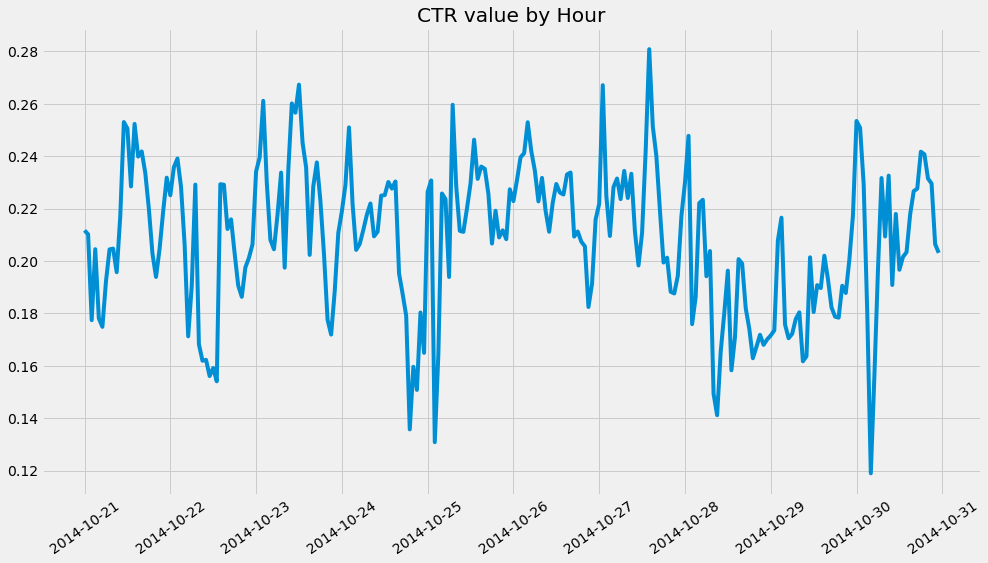

In [8]:
plt.figure(figsize=[15,8])
plt.plot(train_grouped['ctr'])
plt.title('CTR value by Hour')
locs, labels = plt.xticks()
plt.setp(labels, rotation=35);

**Observations**:

The hourly CTR pattern looks like they have a pattern in the way it behaves during different hours of a day. However, there seem to be some outliers. We will use a Simple Outlier Detection algorithm in the next part to analyse it more better. 

### Task 2: Outlier Detection

**Task:** 
* Build a simple outlier detection algorithm based on a "moving average". A data point is identified as an outlier, if it is more than 1.5 standard deviations apart from its calculated moving average. 
* We are assuming that it is a Gaussian distribution here.
* The outcome of this task is a plot, that highlights all found outliers. 

**Steps:**
1. Write a function `outlier_detection` which performs the steps mentioned in the Task description above, and returns a plot that shows
    * CTR
    * Simple Moving Average based on the window_size selected
    * Anomalous points
    
* Outlier Detection algorithm is saved as `outlier_detection.py` and it is imported for use in the following cell. 
* We have called moving average for 3 different window size.

In [9]:
# We only need the ctr column, so we will drop the other columns
train_grouped.drop(columns=['click', 'impressions'], inplace=True)

##### Outlier detection using simple moving average with a window size of 7h

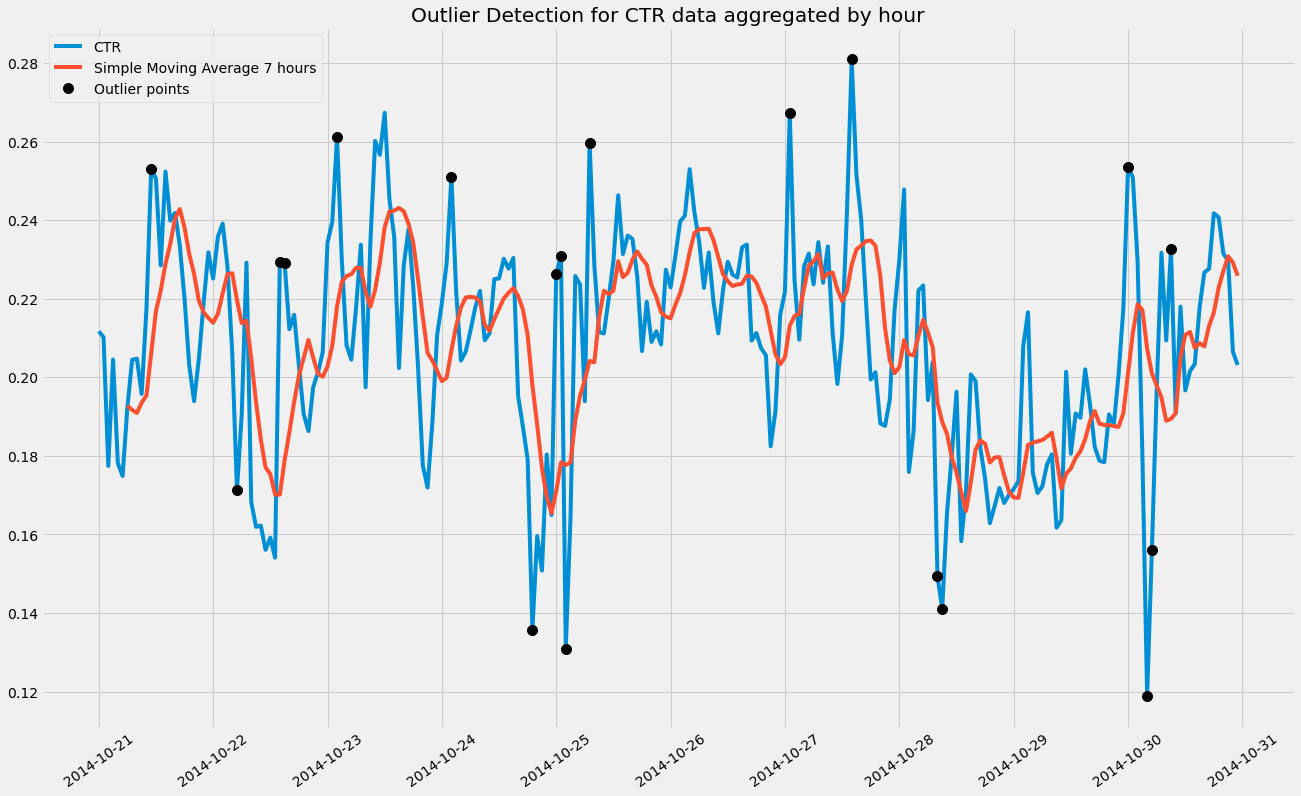

In [10]:
# import outlier_detection class from outlier_detection.py
from outlier_detection import outlier_detection

outliers = outlier_detection()
# Identify outliers using moving_average with a window size of 7 hours
outliers.moving_average(train_grouped, window_size=7)

The black-dots indicate the Outlier points. 

Similarly, we will call the moving_average function for window_size 14 and 24 in the following cells. The values of simple moving average get smoothened out as we increase the window size.

##### Outlier detection using simple moving average with a window size of 14h

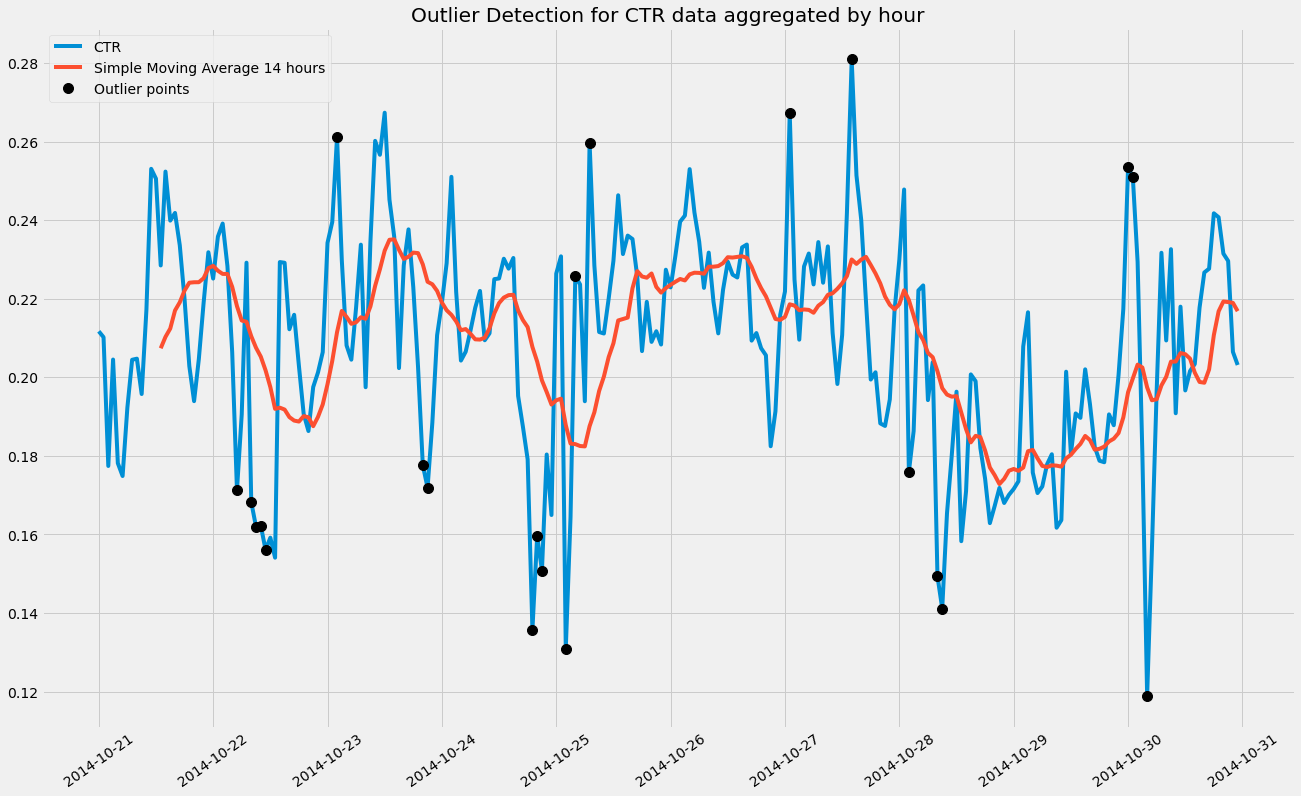

In [11]:
# Identify outliers using moving_average with a window size of 14 hours
outliers.moving_average(train_grouped, window_size=14)

##### Outlier detection using simple moving average with a window size of 7h

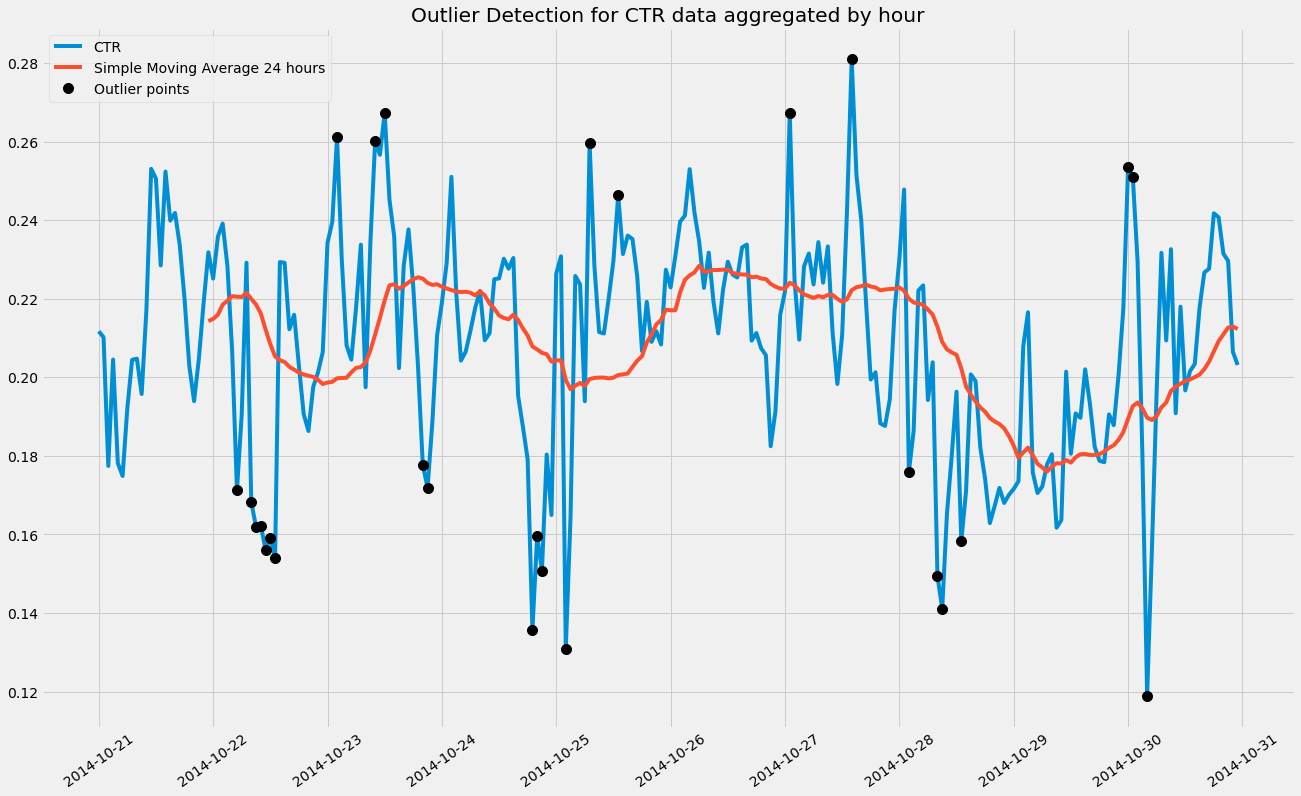

In [12]:
# Identify outliers using moving_average with a window size of 24 hours
outliers.moving_average(train_grouped, window_size=24)